# Everything about Linear Regression

In [178]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
data = '/content/drive/MyDrive/used_cars_data.csv'
data1 = pd.read_csv(data) 
df = data1.copy() #making a copy to avoid changes to the data
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


In [181]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.')  # f-string to get the shape of dataset

There are 7253 rows and 14 columns in this dataset.


In [182]:
np.random.seed(68) #let's take a look at 10 random rows in the dataset
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5441,5441,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,54650,Diesel,Automatic,First,10.91 kmpl,3198 CC,197 bhp,7.000,NaN,30.350
691,691,Hyundai EON Era Plus,Kochi,2016,36700,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.000,NaN,4.380
6394,6394,Maruti Eeco 5 Seater AC,Delhi,2014,51200,Petrol,Manual,First,15.1 kmpl,1196 CC,73 bhp,5.000,4.56 Lakh,NaN
2130,2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,0.0 kmpl,999 CC,null bhp,5.000,NaN,3.480
3047,3047,Volkswagen Polo Diesel Comfortline 1.2L,Kolkata,2012,45000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.000,NaN,2.990
1626,1626,Mercedes-Benz E-Class 2009-2013 E350 CDI Avant...,Kochi,2011,92239,Diesel,Automatic,Second,11.5 kmpl,2987 CC,210 bhp,5.000,NaN,10.600
4377,4377,Porsche Cayenne Diesel,Coimbatore,2015,60395,Diesel,Automatic,First,16.12 kmpl,2967 CC,245 bhp,5.000,NaN,45.820
6553,6553,Hyundai Verna 1.6 CRDi EX AT,Delhi,2013,37000,Diesel,Automatic,First,22.32 kmpl,1582 CC,126.3 bhp,5.000,NaN,NaN
6552,6552,Volkswagen Polo Diesel Comfortline 1.2L,Pune,2011,83000,Diesel,Manual,Second,22.07 kmpl,1199 CC,73.9 bhp,5.000,NaN,NaN
6084,6084,Chevrolet Sail Hatchback 1.2,Kochi,2015,47572,Petrol,Manual,First,18.2 kmpl,1199 CC,82.5 bhp,5.000,NaN,NaN


* We can drop the S.No column as its repetitive of the index and not required in further analysis.
* The Mileage, Engine and Power column are represented as strings when they should be in numerical.
* Mileage has a 0.0 value that should be replace by Nan
* Power has string 'null bhp' which should be replaced by Nan
* The above random sample shows that some columns have a lot of missingness, so that needs to be analysed later and New_price particularly has a lot missing values.
* Price is the dependent variable

In [183]:
df.drop(['S.No.'],axis=1,inplace=True)

In [184]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


**Observations**
* There are 7253 entries across 13 columns
* Mileage, Engine, Power and New_Price columns are in Object datatype.These columns need to be converted to Numerical. 
* The rest of the object datatype need to be converted to Category.
    `coverting "objects" to "category" reduces the space required to store the dataframe. It also helps in analysis`
* We can also see that New_Price column has only 1006 entries. 
* The Price column also has significant missing values.
* Power, Mileage, Seats and Engine have comparatively lesser missing values than the above two.
* From the above details, we see that New_Price column has almost 80% of data missing. This may impact the performance of the model to caluculate the price. Therefore we will drop this column for further analysis.

In [185]:
df.drop(["New_Price"],axis=1,inplace=True)

Let's replace any possible corrupt values like, 0.0 to Nan before proceeding.

In [186]:
import numpy as np
import pandas as pd

num_col = df.select_dtypes(include=np.number).columns.tolist()

for col in num_col:
    df[col] = df[col].replace(0.0, np.nan)

In [187]:
num_col

['Year', 'Kilometers_Driven', 'Seats', 'Price']

# **FIXING DATATYPES**:
- Before getting the summary statistics of the data to analyse the distribution, we must convert them to numerical columns.

In [188]:
num_values = []
#the loop will add all the columns we want to convert form object to numerical into a list
# we can then use this list for conversion
for colname in df.columns[df.dtypes == 'object']:
    if df[colname].str.endswith(('pl', 'kg', 'CC', 'bhp', 'Lakh')).any():
        num_values.append(colname)
print(num_values)

['Mileage', 'Engine', 'Power']


In [189]:
#Writing a function that will help split the string from the numerical values in the columns
#This function will also drop the string and convert to float datatype.
#This function will ensure a clean and faster code
def obj_to_num(n):
    if isinstance(n,str): #checks if the columns are string datatype
        if n.endswith('kmpl'):
            return float(n.split('kmpl')[0])     
        elif n.endswith('km/kg'):                   
            return float(n.split('km/kg')[0])
        elif n.endswith('CC'):
            return float(n.split('CC')[0])
        elif n.startswith('null'):     #replaces values that have string 'null bhp' to Nan
            return(np.nan)          
        elif n.endswith('bhp'):
             return float(n.split('bhp')[0])
    else: 
        return np.nan

for colname in num_values:
    df[colname] = df[colname].apply(obj_to_num)#applying above function to the column list    
    df[colname]=df[colname].replace(0.0,np.nan)

## Fixing Datatypes

In [190]:
df["Name"]=df["Name"].astype("category")
df["Location"]=df["Location"].astype("category")
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].astype("category") 

In [191]:
np.random.seed(68) 
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5441,Ford Endeavour 3.2 Titanium AT 4X4,Coimbatore,2017,54650,Diesel,Automatic,First,10.910,3198.000,197.000,7.000,30.350
691,Hyundai EON Era Plus,Kochi,2016,36700,Petrol,Manual,First,21.100,814.000,55.200,5.000,4.380
6394,Maruti Eeco 5 Seater AC,Delhi,2014,51200,Petrol,Manual,First,15.100,1196.000,73.000,5.000,NaN
2130,Hyundai Santro GLS I - Euro II,Coimbatore,2012,51019,Petrol,Manual,First,NaN,999.000,NaN,5.000,3.480
3047,Volkswagen Polo Diesel Comfortline 1.2L,Kolkata,2012,45000,Diesel,Manual,First,22.070,1199.000,73.900,5.000,2.990
1626,Mercedes-Benz E-Class 2009-2013 E350 CDI Avant...,Kochi,2011,92239,Diesel,Automatic,Second,11.500,2987.000,210.000,5.000,10.600
4377,Porsche Cayenne Diesel,Coimbatore,2015,60395,Diesel,Automatic,First,16.120,2967.000,245.000,5.000,45.820
6553,Hyundai Verna 1.6 CRDi EX AT,Delhi,2013,37000,Diesel,Automatic,First,22.320,1582.000,126.300,5.000,NaN
6552,Volkswagen Polo Diesel Comfortline 1.2L,Pune,2011,83000,Diesel,Manual,Second,22.070,1199.000,73.900,5.000,NaN
6084,Chevrolet Sail Hatchback 1.2,Kochi,2015,47572,Petrol,Manual,First,18.200,1199.000,82.500,5.000,NaN


In [192]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7170 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(2)
memory usage: 520.7 KB


* All datatypes are now fixed and the memory useage has reduced.
* We noticed that the number of missing values has also increased

### Summary of Categorical Variables

In [193]:
df.describe(include=["category"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Observations:**
- We see that ther are 2041 total unique Cars
- More cars are sold in Mumbai and Diesel is the preffered Fuel Type
- Most of the cars sold are Manual Transmission and have only had one previous owner.

- For further processing we have to make the data more manageable.
- Let's group the cars by Brand and Model

In [194]:
df[['Car_Brand','Model']] = df.Name.str.split(n=1,expand=True) #splitting the Brand and the car model

In [195]:
Brand_name=df['Car_Brand'].unique()
Model=df['Model'].unique() # Model names are unique to the Car Brands. 

In [196]:
Brand_name #Checking car brand names 

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

**Observations**:
- We see that Land Rover is mentioned as Land and the Brand Isuzu is mentioned twice

In [197]:
df['Car_Brand']=df['Car_Brand'].replace('Land','Land_Rover') 
df['Car_Brand']=df['Car_Brand'].replace('ISUZU','Isuzu')  #correcting the brands
df['Car_Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land_Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Car_Brand, dtype: int64

**Observations**:
- Maruti and Hyundai are the most popular cars brands
- Honda and Toyota are the next most popular brands
- We also see that the expensive luxury car brands are very few

# **MISSING VALUE:**
- We will replace the missing values in Power,Engine,Mileage and Seats with its median value.

In [198]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [199]:
numeric_columns.remove('Price') #It's the dependent variable
medianFiller = lambda x: x.fillna(x.median())
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

* The Price Column also has missing values(1234) that needs to be treated. 
* Hence we will calculate Median Price per Brand and per Brand's model and replace the missing values in Price column

In [200]:
Median1=[] #creating an empty list to add the median Price of Cars per Brand
for i in range(len(Brand_name)):
    x=df['Price'][df['Car_Brand']==Brand_name[i]].median()
    Median1.append(x)

In [201]:
Median2=[] #Creating an empty list to add the median price of cars per Car model
for i in range(len(Model)):
    x=df['Price'][df['Model']==Model[i]].median()
    Median2.append(x)

In [202]:
df['Price']= df['Price'].fillna(0.0)

In [203]:
for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Model)):  
            if df.Model[i]==Model[j]:  #Comparing the Car model  names in both datasets
                df.Price[i]=Median2[j]  #replacing the Price of the car with the median price of its subsequent model

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7253 non-null   float64 
 8   Engine             7253 non-null   float64 
 9   Power              7253 non-null   float64 
 10  Seats              7253 non-null   float64 
 11  Price              7075 non-null   float64 
 12  Car_Brand          7253 non-null   object  
 13  Model              7253 non-null   object  
dtypes: category(5), float64(5), int64(2), object(2)
memory usage: 634.0+ KB


In [205]:
df[df['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Model
6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.680,2393.000,147.800,7.000,NaN,Toyota,Innova Crysta Touring Sport 2.4 MT
6037,Maruti Swift AMT ZXI,Kochi,2019,15409,Petrol,Automatic,First,22.000,1197.000,81.800,5.000,NaN,Maruti,Swift AMT ZXI
6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.500,1493.000,94.000,5.000,NaN,Skoda,Laura 1.8 TSI Ambition
6043,Honda Civic 2010-2013 1.8 S MT Inspire,Bangalore,2011,40000,Petrol,Manual,Second,15.500,1799.000,132.000,5.000,NaN,Honda,Civic 2010-2013 1.8 S MT Inspire
6076,Toyota Etios Liva 1.4 VXD,Pune,2016,104350,Diesel,Manual,First,23.590,1364.000,67.040,5.000,NaN,Toyota,Etios Liva 1.4 VXD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,Skoda Superb Petrol Ambition,Delhi,2010,40000,Petrol,Manual,First,13.100,1798.000,157.800,5.000,NaN,Skoda,Superb Petrol Ambition
7228,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.280,1047.000,69.000,5.000,NaN,Tata,Tiago 1.05 Revotorq XT Option
7231,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.000,1497.000,121.360,5.000,NaN,Ford,EcoSport 1.5 Petrol Ambiente
7232,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.000,1368.000,160.000,5.000,NaN,Jeep,Compass 1.4 Sport


* The above mentioned cars appear only once in the dataset. Hence we dont have a median price value per its model.
* Therefore we will replace the missing Price of these cars with the median Price of its corresponding Brand, that was calculated earlier. 

In [206]:
df['Price']= df['Price'].fillna(0.0) #replacing the missing values with float 0.0
for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Brand_name)):  
            if df.Car_Brand[i]==Brand_name[j]:  #Comparing the brand names in both datasets
                df.Price[i]=Median1[j]     #replacing with corresponding missing values

In [207]:
df[df['Price'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Model
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.100,1995.000,94.000,5.000,NaN,Hindustan,Motors Contessa 2.0 DSL
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.200,1389.000,88.000,5.000,NaN,OpelCorsa,1.4Gsi


In [208]:
#Dropping the above two cars as there are only one of each per brand
#Also we do not have any further information to calculate its price
df.dropna(axis=0,inplace=True)
df.shape  #we now have 7251 rows and 14 columns

(7251, 14)

### Summary of Numerical Columns

In [209]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7251.000,2013.369,3.247,1998.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7251.000,58699.394,84439.271,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.346,4.134,6.400,15.400,18.200,21.100,33.540
Engine,7251.000,1615.769,593.534,72.000,1198.000,1493.000,1968.000,5998.000
Power,7251.000,112.318,52.929,34.200,77.000,94.000,138.030,616.000
Seats,7251.000,5.278,0.807,2.000,5.000,5.000,5.000,10.000
Price,7251.000,9.328,10.863,0.000,3.500,5.500,9.750,160.000


**Observations**:
* Year:
    - Mean Year of car's is 2013 which is one year short of median. Year starts from 1998 till 2019 implying older to latest car models
* Kilometers_Driven: 
    - The Mean is slightly higher than the median, but the max value is very hight, suggesting outliers
* Mileage: 
    - The Mean and Median of Mileage are fairly close
* Engine and Power & Price
    - The Mean value is significantly higher than the median for all three variables. 
    - Average Price is at 9.33 Lakhs. The Variance is greater than the Mean which suggests wide distribution(skewness) of data. 

# **EXPLORATORY DATA ANALYSIS**

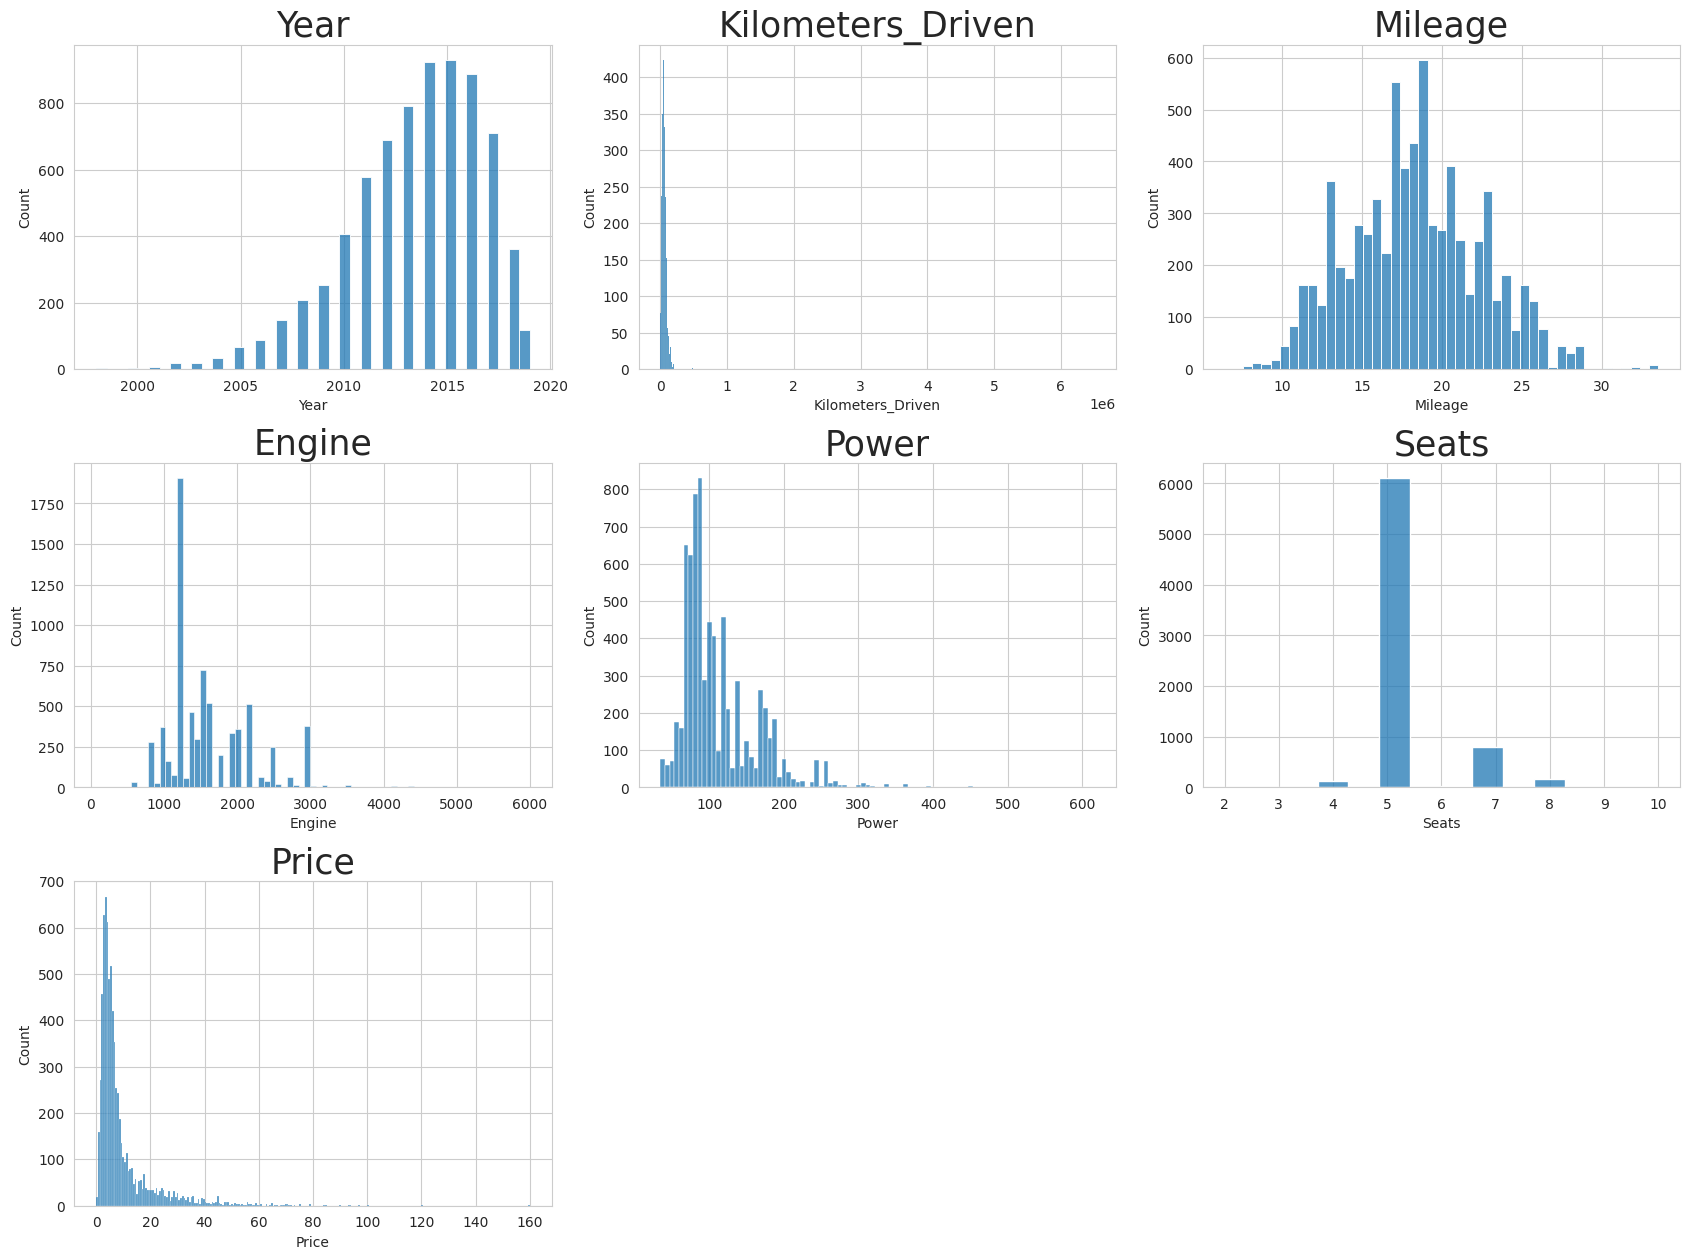

In [210]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
from scipy.stats import norm
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

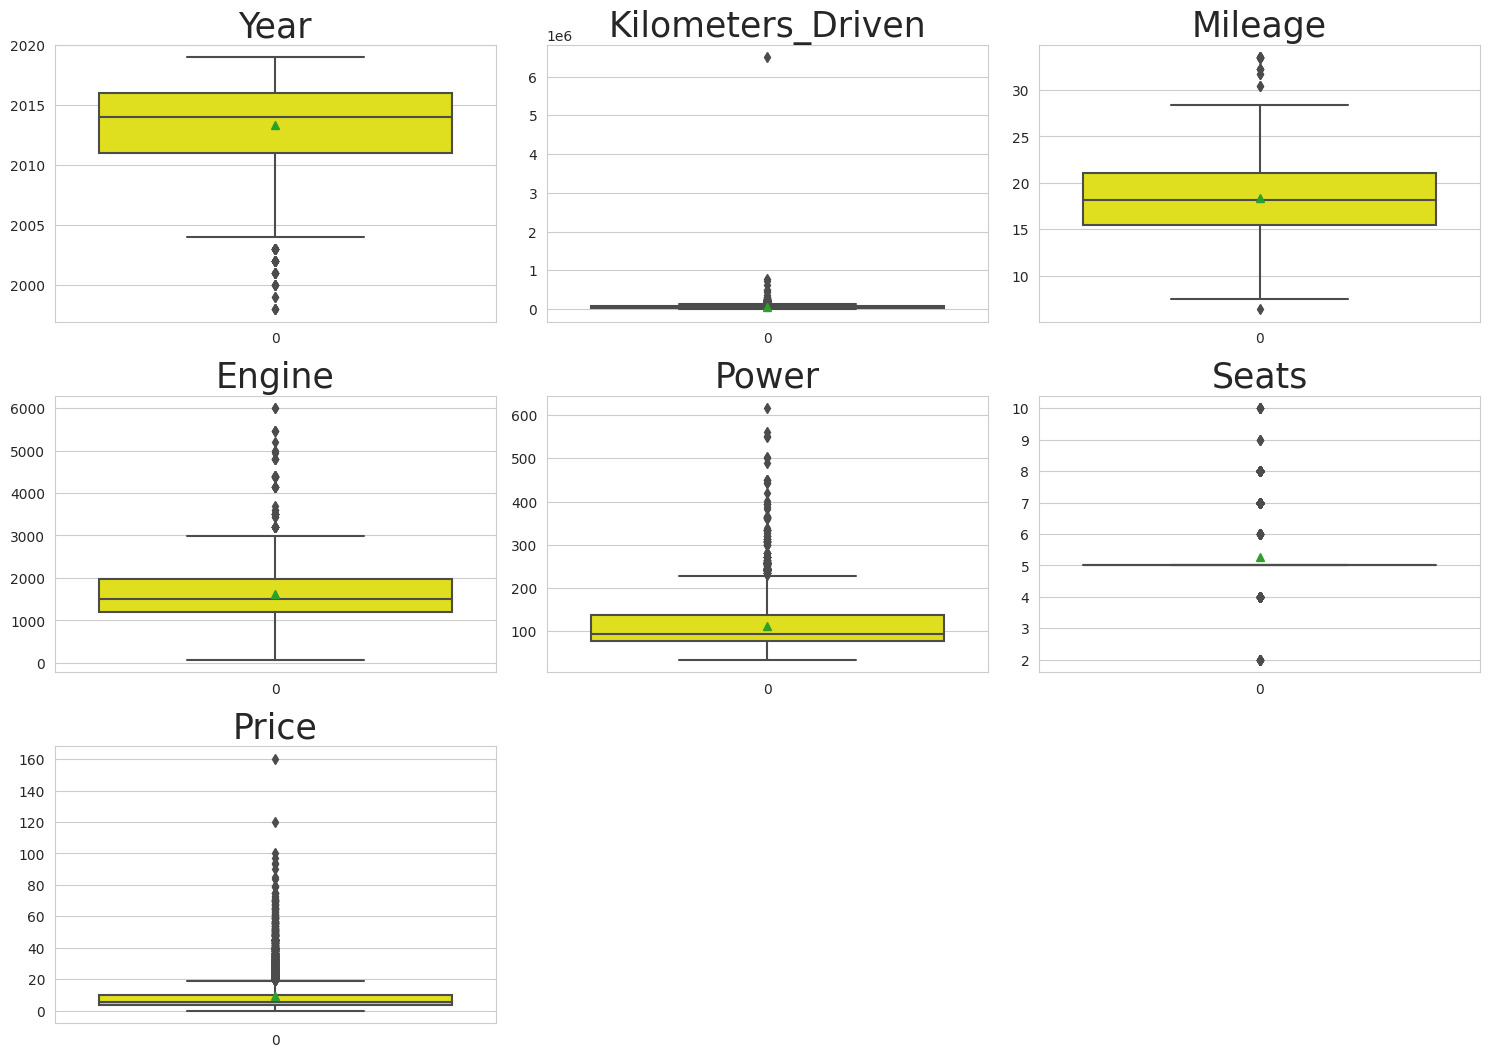

In [211]:
#Plotting a box plot to study central tendency
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

**Observations:** From Both Histogram and Box plots :

* Only Mileage has a somewhat normal distribution
* Year is left-skewed and has comparatively less outliers in the lower end.
* Engine & Power:
    - Both columns are right-skwed with a moderate Inter-Quartile Range and several outliers at the higher scale.
      Power has more outliers comapred to Engine. 
* Kilometer_Driven and Price:
    - Both these columns are heavily right-skewed, with Kilometers_Driven having a very small IQR and one large outlier in the max end. Price column also has several outliers in the higher end. 
    We will treat these outliers as they might have adverse effect in the accuracy of the prediction. But sometimes outliers might have independent significance to the data.
    So, We will also the building model to decide on the outlier treatment

## Feature Engineering:

### Grouping Location by Regions

In [212]:
regions ={'Delhi':'North','Jaipur':'North',
          'Chennai':'South','Coimbatore':'South','Hyderabad':'South','Bangalore':'South','Kochi':'South',
        'Kolkata':'East',
         'Mumbai':'West','Pune':'West','Ahmedabad':'West'}
df['Region']=df['Location'].replace(regions)

### Binning the Car Names by different Price Levels:
- We have 33 car brands and even higher individual models. 
- To manage the data subesequently, we will bin them according to their Price Ranges; from lower/economic cars to luxury/expensive cars
- This will reduce total categories of Cars to just six.

In [213]:
df.drop(["Car_Brand","Model"],axis=1,inplace=True) # no longer needed for Analysis
df['Car_Type'] = pd.cut(df['Price'],[-np.inf,5.5,10.5,20.5,45.0,75.0,np.inf],
                       labels=["Tier1","Tier2","Tier3","Tier4","Tier5","Tier6"])

df['Car_Type'].value_counts()

Tier1    3638
Tier2    1916
Tier3     896
Tier4     669
Tier5     120
Tier6      12
Name: Car_Type, dtype: int64

In [214]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
6898,Ford EcoSport 1.5 Ti VCT MT Titanium,Coimbatore,2018,12899,Petrol,Manual,First,15.850,1499.000,110.400,5.000,5.750,South,Tier2


In [215]:
#Univariate Analysis on Categorical Variables
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()
categorical_val.remove('Name')
categorical_val.remove('Location')

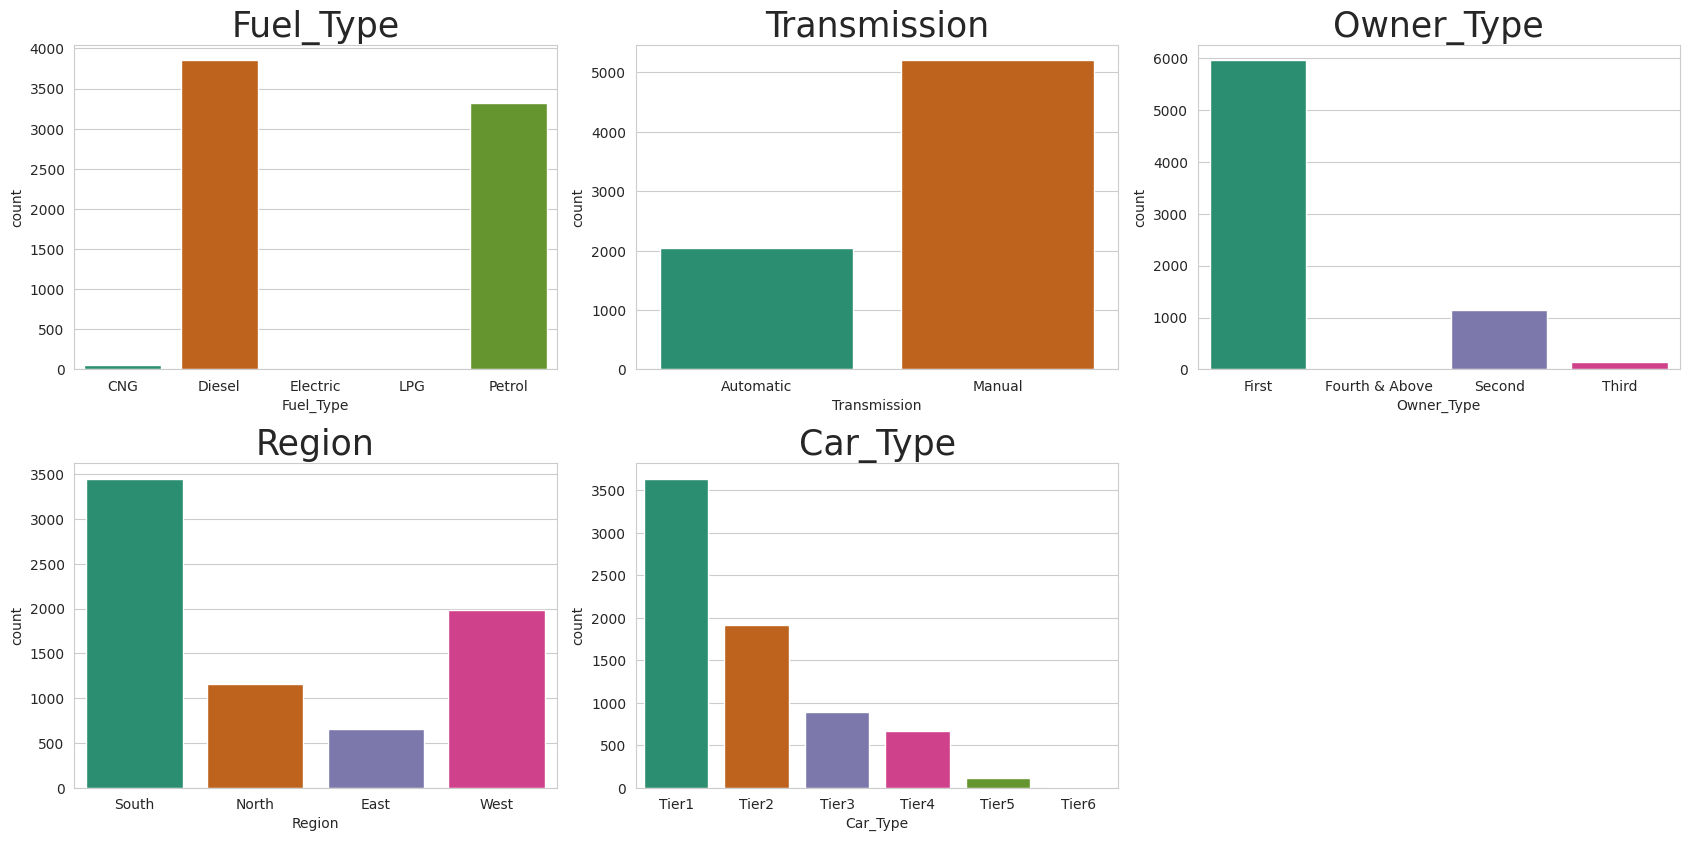

In [216]:
plt.figure(figsize=(17, 75))
for i in range(len(categorical_val)):
    plt.subplot(18, 3, i + 1)
    df[categorical_val[i]] = df[categorical_val[i]].astype("category")  # Convert to category data type
    ax = sns.countplot(data=df, x=categorical_val[i], palette='Dark2')
    plt.tight_layout()
    plt.title(categorical_val[i], fontsize=25)
    if df[categorical_val[i]].dtype != "category":
        total = len(df[categorical_val[i]])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + (p.get_width() / 2) - 0.1
            y = p.get_height()
            ax.annotate(percentage, (x, y), size=13.5, color='black')

plt.show()


**Observations**:
* 82.1% of all cars only have One previous owner.
* 71% of the cars are of Manual Transmission and 47.6% of cars sold in South region.
* We also see that about 49.6% of cars are in Tier1 i.e at Price below 5.5 Lakhs INR.
* Diesel is the most Preferred Fuel_type at 53.1% followed by Petrol 45.8%.CNG and LPG(Gas-reliant) together make 1% of all cars. We are see that the Electric Fuel_Type is at 0.0%, Let's check that

In [217]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,18.200,72.000,41.000,5.000,13.000,South,Tier3
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,18.200,1798.000,73.000,5.000,12.750,West,Tier3


- There are only two cars running in Electric Fuel in this dataset

### Coorelation Matrix:

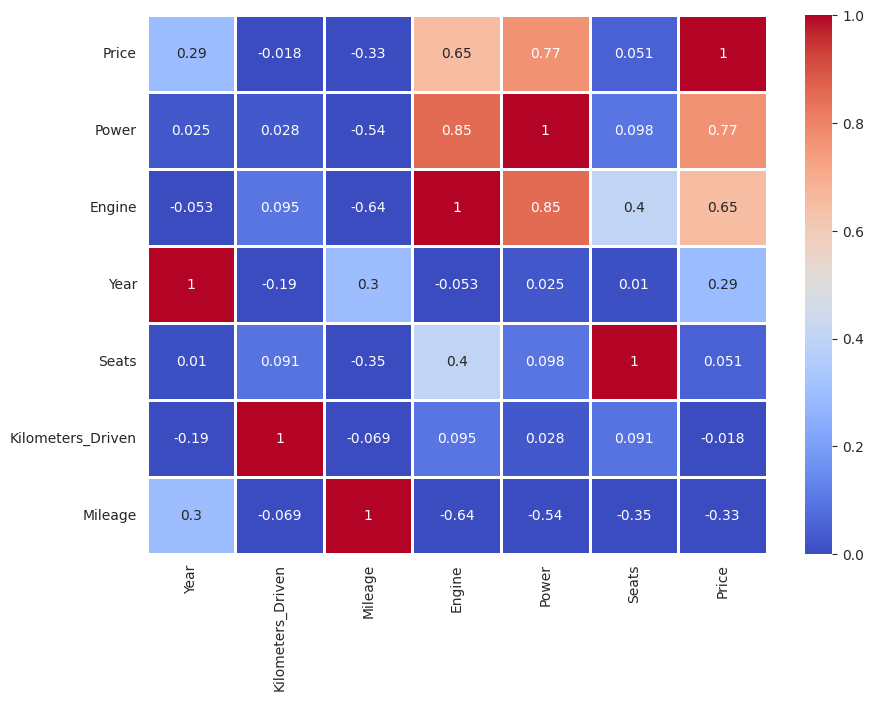

In [218]:
corr= df.corr().sort_values(by=['Price'],ascending=False) #coorelation matrix with respect to dependent variable Price
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

**Insights**:
* Price has high positive correlation with Engine and Power and a lower positive correlation with Year.
* Price has a lower negative correlation with Mileage 
* Engine and Power have a very high positive correlation.
* Mileage has a high negative correlation with Engine and Power

### Bivariate and Multivariate Analysis:

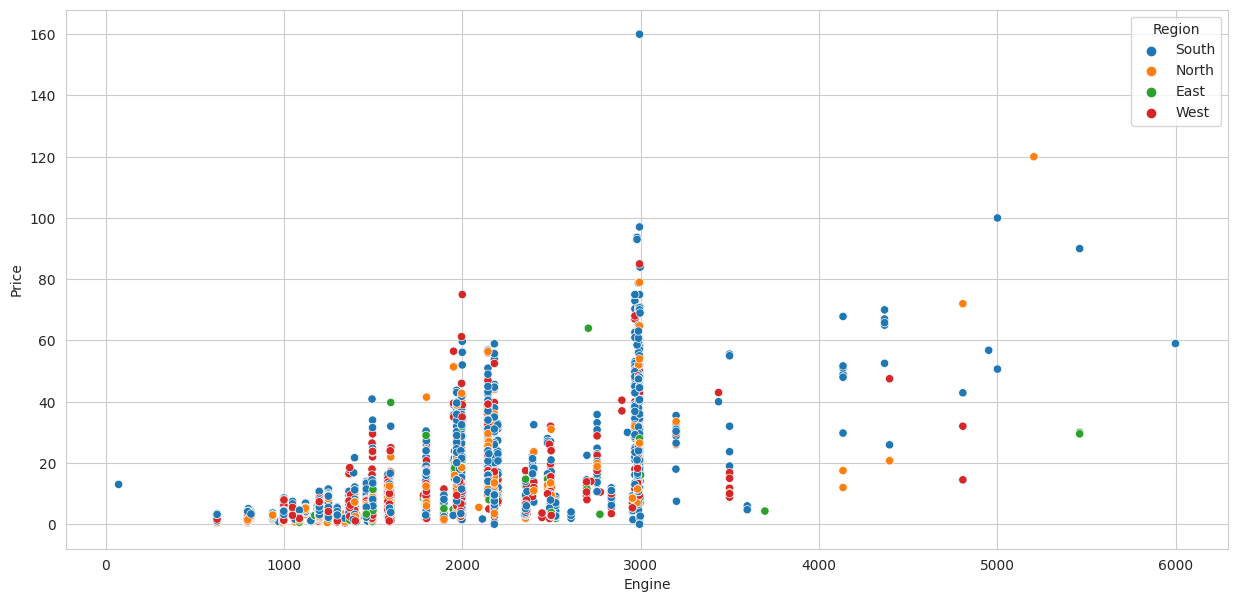

In [219]:
#Analysis of variables that have high correlation with Price
#Price Vs Engine Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Engine',hue='Region')
plt.show()

**Observations**:
* We see that as Engine capacity increases Price of cars also increase.
* We also notice several exceptions to the above case

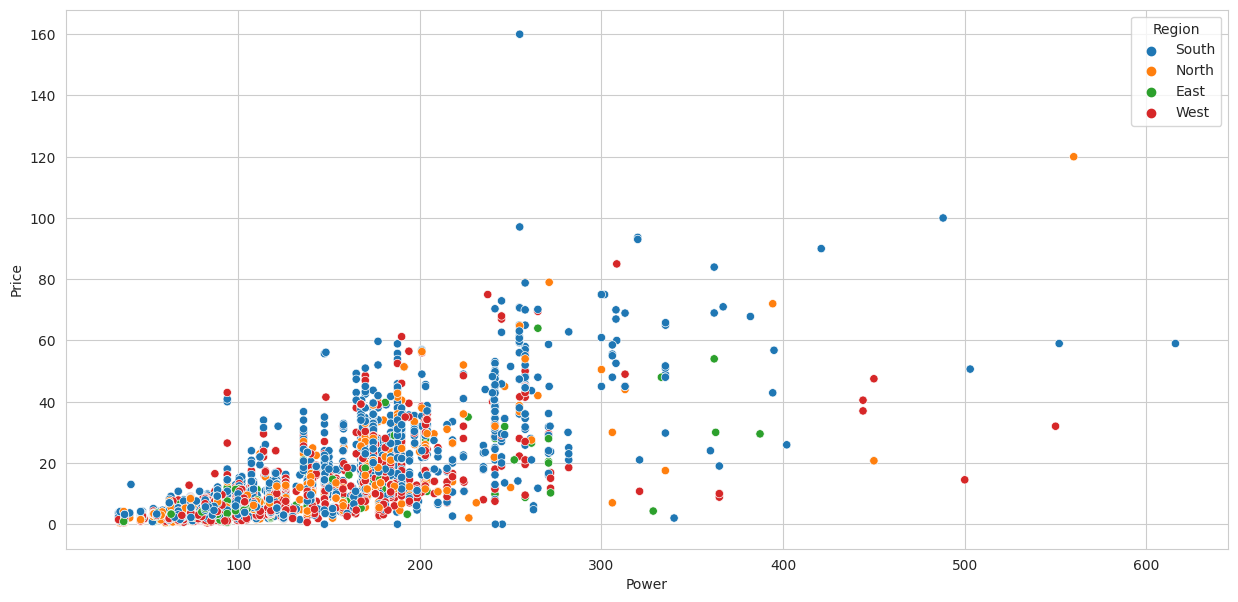

In [220]:
#Price Vs Power Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Power',hue='Region')
plt.show()

**Observations**:
- Price does increase with Power, but we can also see several exceptions.

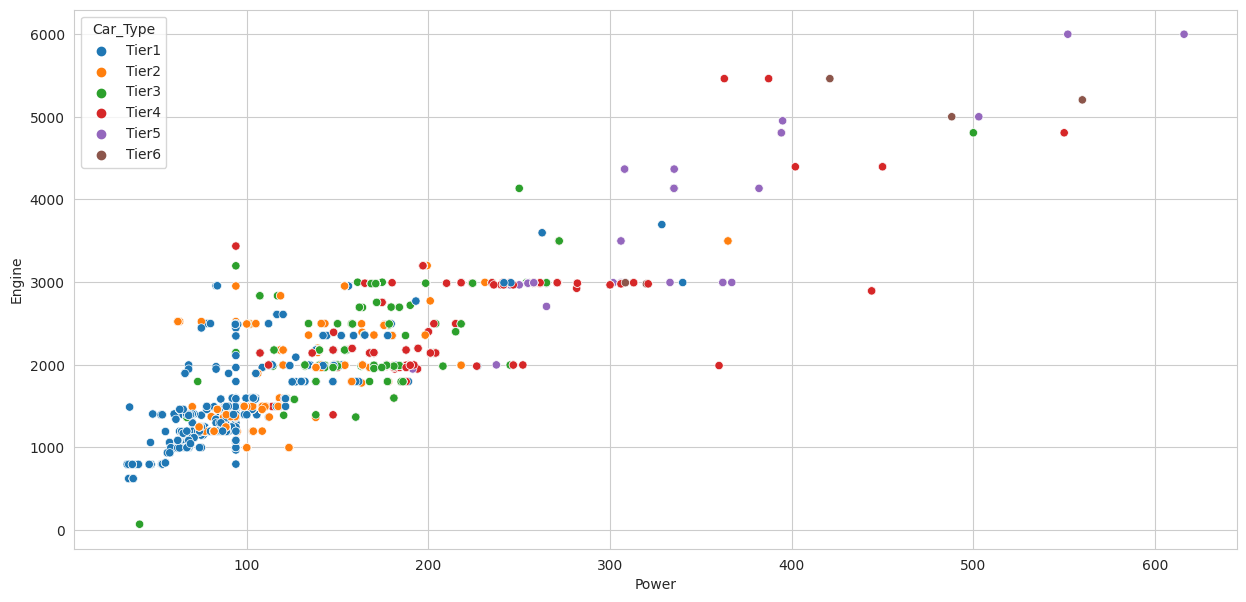

In [221]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Engine',x='Power',hue='Car_Type')
plt.show()

**Observations**:
- From the plot, we see that all three variables have a positive correlation.
- This also suggest multicolinearity between Engine and Power, which must be addressed later

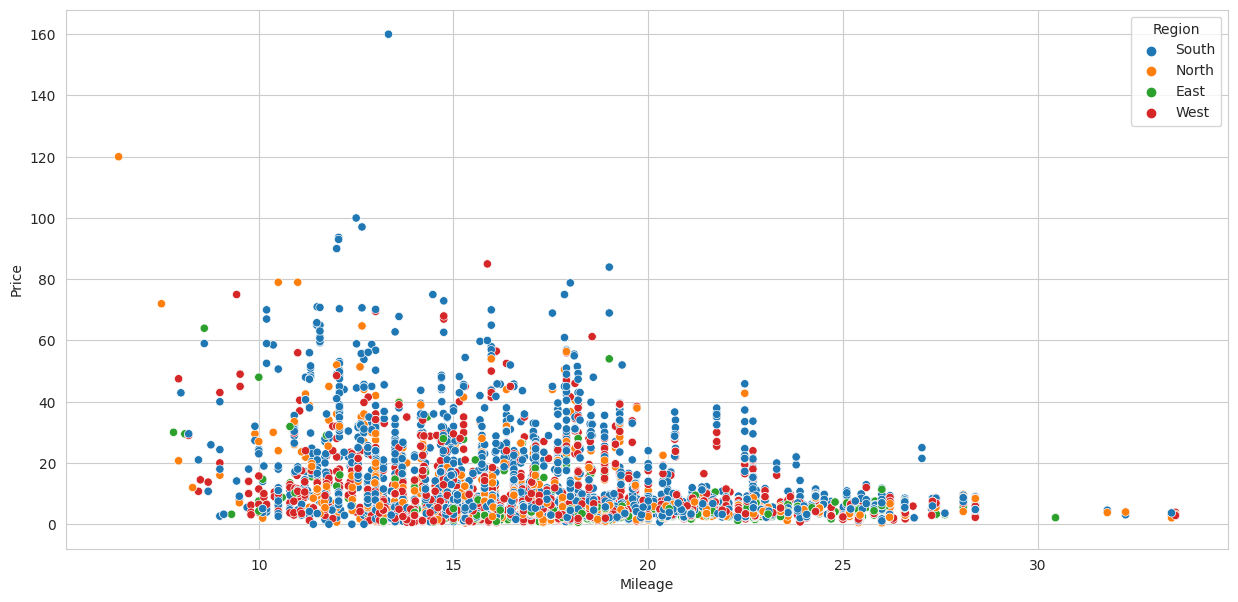

In [222]:
#Price Vs Mileage Vs Region
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,y='Price',x='Mileage',hue='Region')
plt.show()

**Observations**:
* Price and Mileage have a negative correlation with a few exceptions.

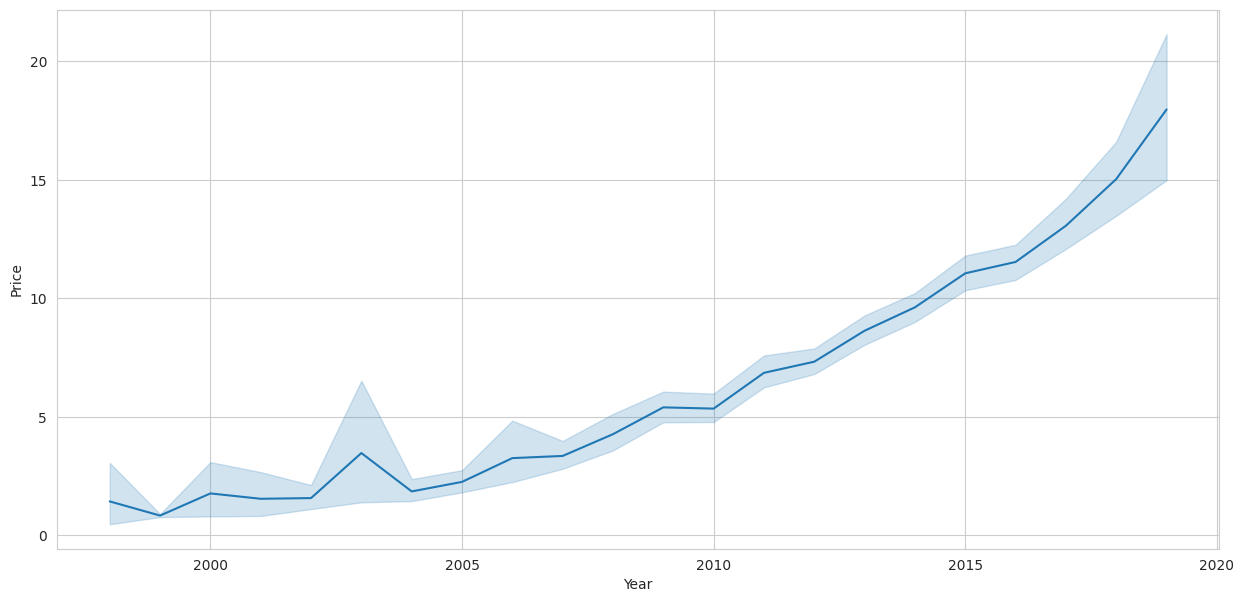

In [223]:
#How does Manufacture Year affect Price?
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',
             data=df);

**Observations**:
* Overall as Manufacture Year rises, Price of Car also increases.

<Axes: xlabel='Year', ylabel='Kilometers_Driven'>

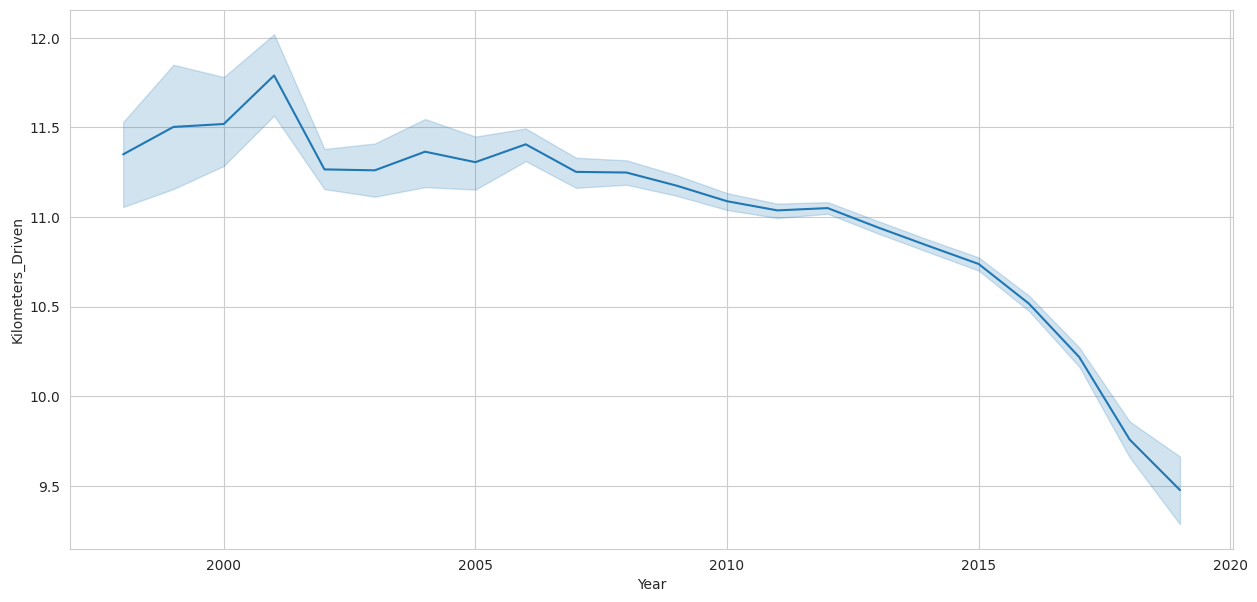

In [224]:
#Kilometers_Driven Vs Year
#Since The range for Kilometers is very wide, we will log transform to a manageable scale
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y=np.log(df['Kilometers_Driven']),
             data=df)

**Observations**:
* Year and Kilomertes_driven have a negative correlation
* This is to be expected as lastest model used cars probably have less useage before being sold.

<Axes: xlabel='Engine', ylabel='Mileage'>

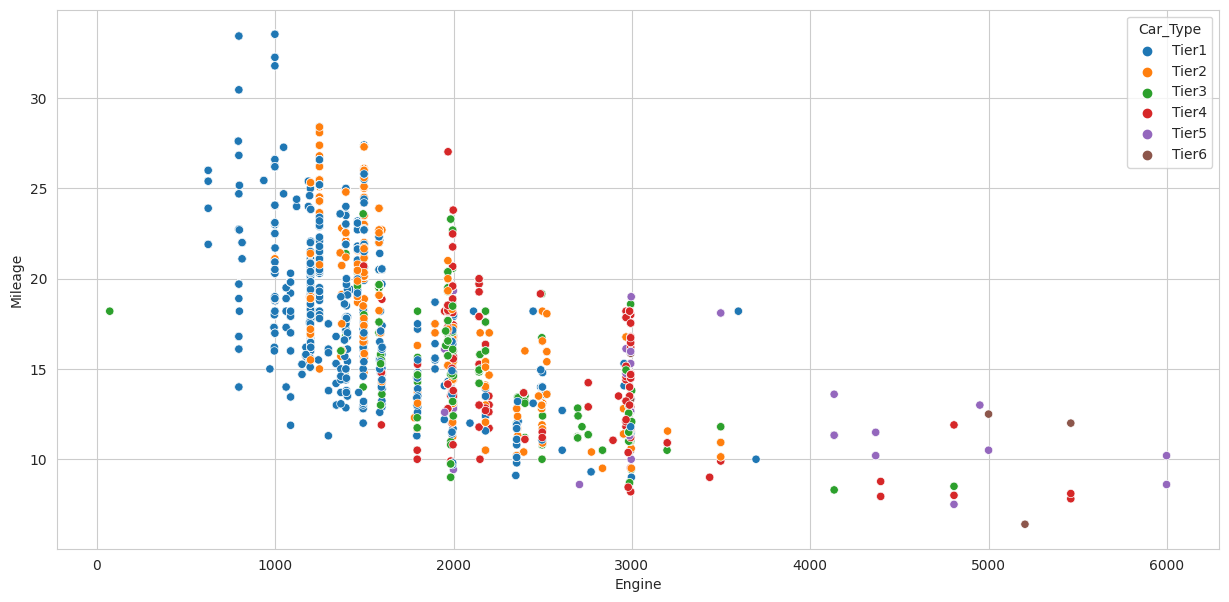

In [225]:
#Engine Vs Mileage Vs Car_Type
plt.figure(figsize=(15,7))
sns.scatterplot(x='Engine', y='Mileage',hue='Car_Type',
             data=df)

**Observations**:
- Most cars in Tier1 have less Engine CC and therefore Higher Mileage

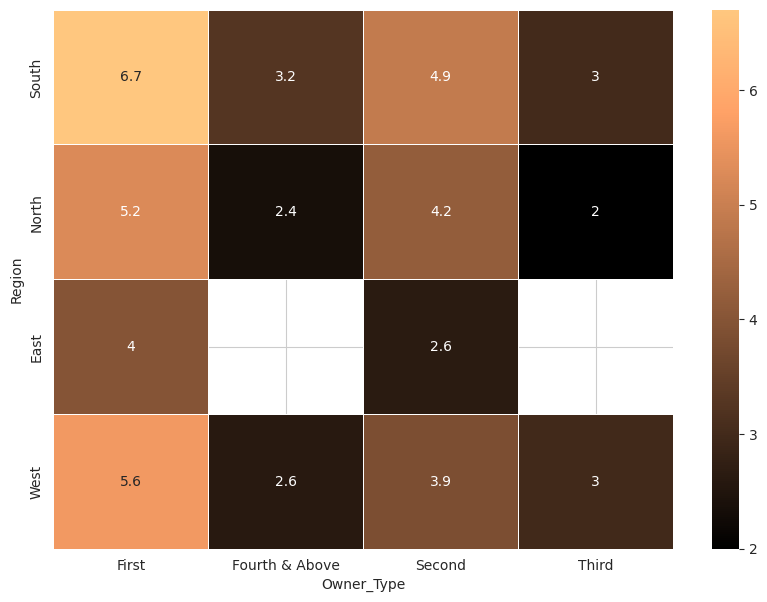

In [226]:
#Does type of ownership affect Car price?
df_hm =df.pivot_table(index = 'Region',columns ='Owner_Type',values ="Price",aggfunc=np.median)
# Draw a heatmap 
plt.subplots(figsize=(10,7))
sns.heatmap(df_hm,cmap='copper',linewidths=.5, annot=True);

**Observations**:
* Mean Price of cars decrease as number of ownership of cars increases across all regions
* The South region also has the highest Median Price for Cars with only one previous owner, followed by West then North and East
* We also see that in East there are only two Owner_types
* This suggests that type of ownership does affects overall car price.

<Axes: xlabel='Fuel_Type', ylabel='Price'>

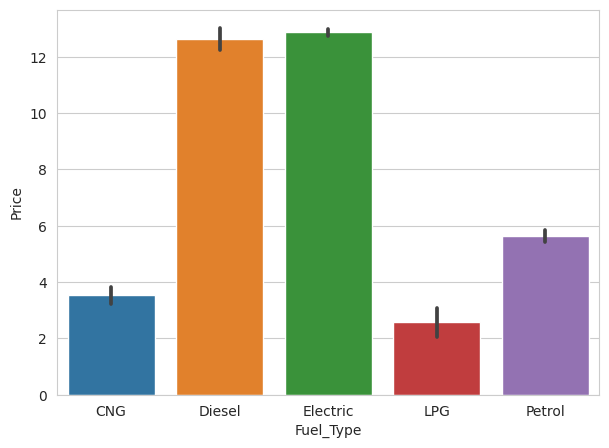

In [227]:
#Does type of Fuel affect car price?
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Fuel_Type',y='Price')

**Observations**: 
* Electric Car's have an equal Price range compared to Diesel.
* We know that there are only two cars with Electric Fuel_Type in this data, which is a very small sample size.
* Hence we will drop Fuel_Type while building the ML model, as it might affect the accuracy.

# **OUTLIER TREATMENT**

In [228]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df    

# **MODEL BUILDING**

### We will build a Predictive model with and without treating the Outliers and compare it's performances to decide if the outliers have any adverse impact to the linear model.

In [229]:
df2=df.copy() #making the first copy
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Year')
numerical_col.remove('Mileage')
numerical_col.remove('Seats')  #Dropping Year,Mileage and Seats as they dont have very high outliers
numerical_col

['Kilometers_Driven', 'Engine', 'Power', 'Price']

In [230]:
df2 = treat_outliers_all(df2,numerical_col) #treating outliers 

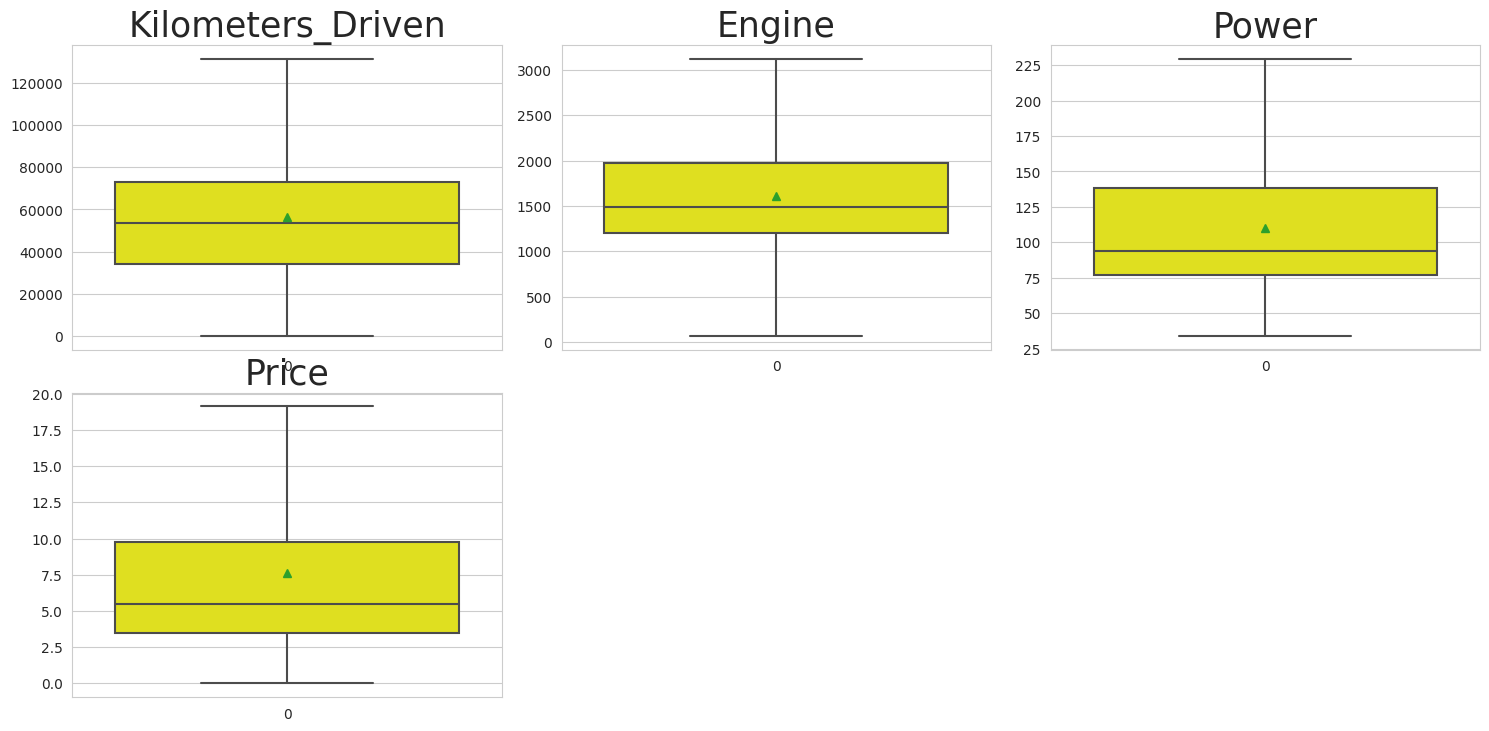

In [231]:
#checking if the outliers are treated
plt.figure(figsize=(15,35))
for i in range(len(numerical_col)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df2[numerical_col[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(numerical_col[i],fontsize=25)

plt.show()

**Observations:**
- The Outliers for Engine, Price, Power and Kilometers_driven is treated
- We will build a model with this treated dataset to analyse the Price

## Model Building 1 - With Treated Outliers

In [232]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,1.750,West,Tier1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,12.500,West,Tier3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,4.500,South,Tier1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,6.000,South,Tier2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,17.740,South,Tier3


In [233]:
X = df2.drop(['Name','Fuel_Type','Location','Price'], axis=1)
#dropping Name as we bins via Car_Type
#dropping Fuel_Type to not affect the accuracy of the model
y = df2[['Price']]

print(X.shape)
print(y.shape)

(7251, 10)
(7251, 1)


In [234]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking
X = pd.get_dummies(X, columns=['Transmission','Owner_Type','Region','Car_Type'], drop_first=True)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_East,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
0,2010,72000,26.600,998.000,58.160,5.000,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19.670,1582.000,126.200,5.000,1,0,0,0,0,0,1,0,1,0,0,0
2,2011,46000,18.200,1199.000,88.700,5.000,1,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.770,1248.000,88.760,7.000,1,0,0,0,0,0,0,1,0,0,0,0
4,2013,40670,15.200,1968.000,140.800,5.000,0,0,1,0,0,0,0,0,1,0,0,0


In [235]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56) # keeping random_state =56 ensuring datasplit remains consistent
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_East,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
1928,2016,55100,17.010,1582.000,126.200,5.000,0,0,0,0,0,0,1,0,1,0,0,0
6278,2012,90000,23.590,1364.000,94.000,5.000,1,0,0,0,0,0,0,0,0,0,0,0
22,2015,55985,13.530,1984.000,177.010,5.000,0,0,0,0,0,0,1,0,0,1,0,0
5925,2010,85000,17.500,1798.000,94.000,5.000,1,0,0,0,0,0,1,0,0,0,0,0
5762,2014,51000,27.030,1969.000,190.000,5.000,0,0,0,0,0,0,0,0,0,1,0,0


In [236]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)
print("Intercept of the linear equation:", linearregression.intercept_) 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))

Intercept of the linear equation: [-404.48666822]
The coefficient for Year is 0.20142498161521044
The coefficient for Kilometers_Driven is -1.6203755332221419e-06
The coefficient for Mileage is 0.043497482630392506
The coefficient for Engine is 0.0007955011277483706
The coefficient for Power is 0.016005440241528588
The coefficient for Seats is 0.0709191346883875
The coefficient for Transmission_Manual is -0.7422961502300838
The coefficient for Owner_Type_Fourth & Above is 0.5406481259193564
The coefficient for Owner_Type_Second is -0.09782155395636222
The coefficient for Owner_Type_Third is -0.23169983508214576
The coefficient for Region_North is -0.17742350452247788
The coefficient for Region_East is -0.3898811409975661
The coefficient for Region_West is -0.12022385818818576
The coefficient for Car_Type_Tier2 is 2.603325608632867
The coefficient for Car_Type_Tier3 is 8.598665328915178
The coefficient for Car_Type_Tier4 is 12.049331760790817
The coefficient for Car_Type_Tier5 is 10.894

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test) 

### Model Performances:

In [238]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.890301560795303

In [239]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

1.2151844128866238

In [240]:
# R-squared on test
r2_score(y_test, pred)

0.9536193921069148

In [241]:
# Training Score

linearregression.score(X_train, y_train)  # 70 % data 

0.9520061630151408

In [242]:
# Testing score

linearregression.score(X_test, y_test) # unseen data

0.9536193921069148

**Observations**:
- From the above model we see that the  $R^2$ is 0.953, that explains 95.3% of total variation in dataset. This model is a good fit.

## Model Building 2 - Without Treating Outliers

In [243]:
df3=df.copy() #making the second copy
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Region,Car_Type
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,1.750,West,Tier1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,12.500,West,Tier3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,4.500,South,Tier1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,6.000,South,Tier2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,17.740,South,Tier3


In [244]:
X1 = df3.drop(['Name','Fuel_Type','Location','Price'], axis=1)
#dropping Name as we bins via Car_Type
#dropping Fuel_Type to not affect the accuracy of the model
y1 = df3[['Price']]

print(X1.shape)
print(y1.shape)

(7251, 10)
(7251, 1)


In [245]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking
X1 = pd.get_dummies(X1, columns=['Transmission','Owner_Type','Region','Car_Type'], drop_first=True)
X1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_East,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
0,2010,72000,26.600,998.000,58.160,5.000,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19.670,1582.000,126.200,5.000,1,0,0,0,0,0,1,0,1,0,0,0
2,2011,46000,18.200,1199.000,88.700,5.000,1,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.770,1248.000,88.760,7.000,1,0,0,0,0,0,0,1,0,0,0,0
4,2013,40670,15.200,1968.000,140.800,5.000,0,0,1,0,0,0,0,0,1,0,0,0


In [246]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=56)
X1_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_East,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
1928,2016,55100,17.010,1582.000,126.200,5.000,0,0,0,0,0,0,1,0,1,0,0,0
6278,2012,90000,23.590,1364.000,94.000,5.000,1,0,0,0,0,0,0,0,0,0,0,0
22,2015,55985,13.530,1984.000,177.010,5.000,0,0,0,0,0,0,1,0,0,1,0,0
5925,2010,85000,17.500,1798.000,94.000,5.000,1,0,0,0,0,0,1,0,0,0,0,0
5762,2014,51000,27.030,1969.000,190.000,5.000,0,0,0,0,0,0,0,0,0,1,0,0


In [247]:
#Fitting linear model
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X1_train, y1_train)                                  
print("Intercept of the linear equation:", linearregression.intercept_) 
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearregression.coef_[0][idx]))  

Intercept of the linear equation: [-558.98962809]
The coefficient for Year is 0.2781520771164888
The coefficient for Kilometers_Driven is -3.933049214244026e-06
The coefficient for Mileage is 0.04117302098035342
The coefficient for Engine is 0.0012536524615098027
The coefficient for Power is 0.021857197060797872
The coefficient for Seats is -0.1044321343951855
The coefficient for Transmission_Manual is -0.555385764006441
The coefficient for Owner_Type_Fourth & Above is 1.0602936298239898
The coefficient for Owner_Type_Second is -0.012176133022344568
The coefficient for Owner_Type_Third is 0.1997211759218299
The coefficient for Region_North is -0.22090807983251942
The coefficient for Region_East is -0.6551430985061962
The coefficient for Region_West is -0.2702139016841279
The coefficient for Car_Type_Tier2 is 2.1873459098796735
The coefficient for Car_Type_Tier3 is 7.852889631704635
The coefficient for Car_Type_Tier4 is 21.44815767368214
The coefficient for Car_Type_Tier5 is 45.73101094

In [248]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred1 = linearregression.predict(X1_test)

In [249]:
# Mean Absolute Error on test
mean_absolute_error(y1_test, pred1)

1.5128627827869945

In [250]:
# RMSE on test data
mean_squared_error(y1_test, pred1)**0.5

3.0936845704633105

In [251]:
# R-squared on test
r2_score(y1_test, pred1)

0.9215069184355414

In [252]:
# Training Score

linearregression.score(X1_train, y1_train)  # 70 % data

0.9450553498559194

In [253]:
# Testing score

linearregression.score(X1_test, y1_test) # unseen data

0.9215069184355414

**Observations**:
- From the above model we see that the  $R^2$ is 0.921, that explains 92.1% of total variation in dataset. Though this model is a decent fit, its less than the $R^2$ value from Model 1. 
- Also we see that the Training and Testing Scores for this model are 94.5% and 92.1% which has a marginal difference.
-  Hence we shall proceed with the Model 1 for further analysis and  Stats model.

# Stats Model:
- Using Stats Model in Python, we will get an list of statistical results for each estimator.
- Stats Model is also used to further conduct tests and statistical data exploration

In [254]:
# Lets us build linear regression model using statsmodel 
import statsmodels.api as sm
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

olsmod0 = sm.OLS(y_train, X_train1) #y_train remains same 
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     5572.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:01   Log-Likelihood:                -8236.5
No. Observations:                5075   AIC:                         1.651e+04
Df Residuals:                    5056   BIC:                         1.664e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Insights**:
- The P-Value of the variable indicates if the its significant or not.
- The level of significance is 0.05 and any p-value less than 0.05 , then that variable would be considered significant.

## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model and ranges from 0 to 1
    - A high Adjusted R-Squared values indicated a good fit. In this model, the Adj. R-squared is **0.953**, which is good!
2. **const coefficient** is the Y-intercept.
    - If all the independent variables are zero, then the expected output will be equal to const coefficient, which in this case is **-40.48**
3. **std err**: It reflects the level of accuracy of the coefficients.
      - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
    -  This shows that for each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent variable is not significant 

    Ha : Independent variable is significant
    - If p-value is less than 0.05 , then the variable is considered to be statistically significant.
  
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall.
    - The current confidence interval is at 95% 

# **LINEAR REGRESSION ASSUMPTIONS**:
-  No Multicollinearity
-  Mean of residuals should be 0
-  No Heteroscedacity
-  Linearity of variables
-  Normality of error terms

### Checking for Multicollinearity using VIF Scores:
- Multicollinearity occurs when there is correlation between the predictor variables.
- Since the variables are required to be independent,having a correlation will lead to inaccuracy in the model.
- VIF(Variance Inflation Factor) scores measures how much the variance of an estimated regression coefficient is increased by collinearity. VIF scores quantify the severity of multi-collinearity in OLS stats model.
- If VIF value exceeds or is close to 5 then we there is moderate correlation.
- IF VIF value exceed or is close to 10 then it shows high multi-collinearity

In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                       843909.643
Year                             2.198
Kilometers_Driven                1.688
Mileage                          2.122
Engine                           6.520
Power                            7.102
Seats                            1.818
Transmission_Manual              2.120
Owner_Type_Fourth & Above        1.013
Owner_Type_Second                1.139
Owner_Type_Third                 1.077
Region_North                     1.145
Region_East                      1.190
Region_West                      1.189
Car_Type_Tier2                   1.669
Car_Type_Tier3                   2.284
Car_Type_Tier4                   3.052
Car_Type_Tier5                   1.641
Car_Type_Tier6                   1.116
dtype: float64



**Observations**:
* Engine and Power have VIF scores greater than 5. This suggests that there is moderate to high collinearity suggesting the 2 variables are correlated to each other.
* This makes sense as High Engine efficiency leads to high Power in a vehicle.
* Hence to remove multi-collinearity, we will drop Power column first as it has a higher score.

In [256]:
X_train2 = X_train1.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                       841970.738
Year                             2.194
Kilometers_Driven                1.688
Mileage                          2.093
Engine                           3.925
Seats                            1.625
Transmission_Manual              1.957
Owner_Type_Fourth & Above        1.012
Owner_Type_Second                1.138
Owner_Type_Third                 1.077
Region_North                     1.143
Region_East                      1.185
Region_West                      1.185
Car_Type_Tier2                   1.586
Car_Type_Tier3                   2.077
Car_Type_Tier4                   2.577
Car_Type_Tier5                   1.532
Car_Type_Tier6                   1.107
dtype: float64



- The VIF scores have reduced for Engine and there is no more collinearity in the model

In [257]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     5601.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:01   Log-Likelihood:                -8362.3
No. Observations:                5075   AIC:                         1.676e+04
Df Residuals:                    5057   BIC:                         1.688e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**:
- The Adj.$R^2$ has reduced from 0.952 to 0.949 - which is still good.

In [258]:
X_train3 = X_train1.drop('Engine', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                       842540.095
Year                             2.195
Kilometers_Driven                1.625
Mileage                          2.013
Power                            4.275
Seats                            1.401
Transmission_Manual              2.114
Owner_Type_Fourth & Above        1.012
Owner_Type_Second                1.138
Owner_Type_Third                 1.077
Region_North                     1.145
Region_East                      1.188
Region_West                      1.189
Car_Type_Tier2                   1.647
Car_Type_Tier3                   2.235
Car_Type_Tier4                   3.010
Car_Type_Tier5                   1.590
Car_Type_Tier6                   1.096
dtype: float64



- The VIF scores have reduced for Power and there is no more collinearity in the model

In [259]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     5775.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:01   Log-Likelihood:                -8288.4
No. Observations:                5075   AIC:                         1.661e+04
Df Residuals:                    5057   BIC:                         1.673e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations**:
- The Adj. $R^2$ is 0.951 for olsres2, which is better than the olsres1 at 0.949
- Hence we will proceed further with olsres2 for further analysis.
- Now that there is no multi-collinerity, we check the p-values of the predictor variables for insignificance


**Observations**:
* Kilometers_Driven, Owner_Type_Fourth & Above and Owner_Type_Second p-value greater than 0.05 and therefore is not significant.
* We will only be dropping Kilometers_Driven and not the other two despite high p-values. 
* Owner_Type_Fourth & Above and Owner_Type_Second are part of the categorical variable Owner_Type and there are other significant values in this category.

In [260]:
X_train4 = X_train3.drop('Kilometers_Driven', axis=1)
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     6137.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:01   Log-Likelihood:                -8288.4
No. Observations:                5075   AIC:                         1.661e+04
Df Residuals:                    5058   BIC:                         1.672e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Since there are no more p-values greater than 0.05, olsres 3 is the final model and X_train4 is the final data.

**Observations**:
- The Adjusted R-Squared for the model is 0.951. This shows that the model is able to explain 95.1% of the variance.
- The Adjusted R-Squared in OLSres0 was 95.2%.This shows that the dropped variables did not affect the model very much.
- Hence this model is a good fit.

#### Checking if Mean of residuals should be 0 for OLSres3
* Residual is the difference between the observed x-value and the fitted x-value to the best fit line.

In [261]:
residual= olsres3.resid
np.mean(residual)

-1.6759533006057751e-12

* Mean of Residuals is very close to 0.

### Test for Linearity:
* To check if there is a linear (Straight-line) relationship between the dependent and independent variables.
* To check, we will plot between Fitted values Vs Residuals
* Fitted or Predicted value describes where the particular x-value fits in the best fit line.

In [262]:
residual=olsres3.resid
fitted=olsres3.fittedvalues #predicted values

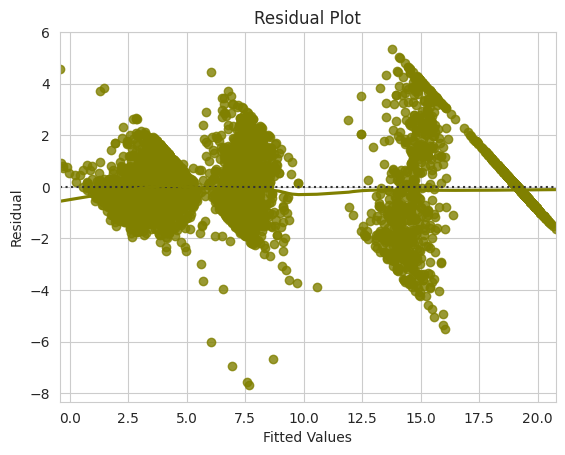

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.residplot(x=fitted, y=residual, color="olive", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

* The Scatterplot shows that the distribution between Residuals(errors) and Fitted values has no pattern.
* Hence Linearity assumption is satisfied

### TEST FOR NORMALITY:
* The Residuals should be normally distributed.
* We will perform the test for Normality in the following steps:
    - Histogram of Residuals
    - Q-Q plot 
* Further analysis of data will be performed if any the above tests fail.

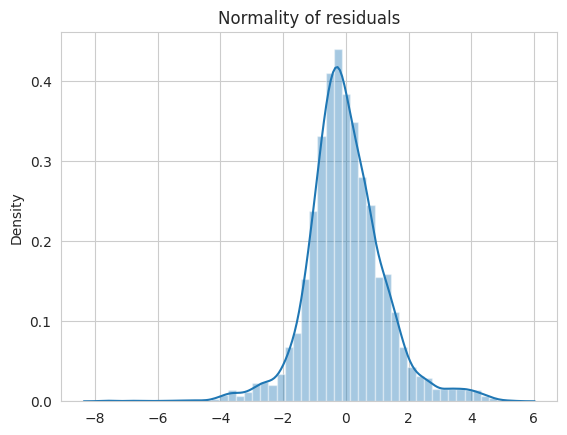

In [264]:
#Histogram of Residuals
sns.distplot(residual) 
plt.title('Normality of residuals')
plt.show()

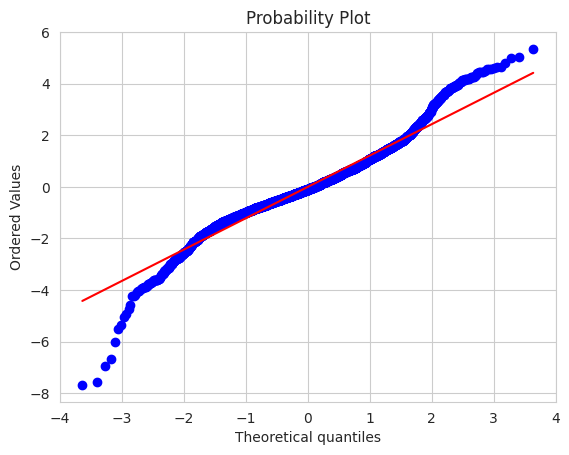

In [265]:
# Q-Q plot to check the normal probability of residuals.
# It should approximately follow a straight line
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

* The Q-Q plot is approximately straight line
* Hence the Test for Linearity is satisfied

### TEST FOR HOMOSCEDASTICITY:
* The assumption is that the variance of the residuals  is equal/same across all values of independent variabels for the final data. i.e The Error term doesnt vary too much when the Indipendent(Predictor) variable changes, Homoscedastic
* If the variance is not equal then the data is Hetroscedastic
    - Null Hypothesis : Residuals are equal across independent variables
    - Alternate Hypothesis : Residuals are not equal across independent variables

In [266]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train4)
lzip(name, test) #returns a list of values

[('F statistic', 1.0338072184164302), ('p-value', 0.2019967034625093)]

* The p-value 0.202 is greater than level of confidence. i.e p-value>0.05.
* Hence we fail to reject the Null Hypothesis. Thus the Residuals are equal (Homoscedastic) across all independent variables.

#### All Linear Regression Assumptions have been satisfied.


### Predicting on Test Data:

In [267]:
X_train4.columns

Index(['const', 'Year', 'Mileage', 'Power', 'Seats', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Region_North', 'Region_East', 'Region_West', 'Car_Type_Tier2',
       'Car_Type_Tier3', 'Car_Type_Tier4', 'Car_Type_Tier5', 'Car_Type_Tier6'],
      dtype='object')

In [268]:
X_test_final = X_test[X_train4.columns]
X_test_final.head()

,const,Year,Mileage,Power,Seats,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Region_North,Region_East,Region_West,Car_Type_Tier2,Car_Type_Tier3,Car_Type_Tier4,Car_Type_Tier5,Car_Type_Tier6
1083,1.000,2015,21.430,87.200,5.000,1,0,0,0,0,1,0,1,0,0,0,0
4601,1.000,2019,20.680,190.000,5.000,0,0,0,0,0,0,0,0,0,1,0,0
1969,1.000,2011,12.400,132.000,8.000,1,0,0,0,0,1,0,1,0,0,0,0
5344,1.000,2015,18.600,81.830,5.000,1,0,0,0,0,0,0,0,0,0,0,0
2056,1.000,2015,16.770,229.575,5.000,0,0,1,0,0,0,0,0,0,1,0,0


In [269]:
y_pred = olsres3.predict(X_test_final)

### Checking the performace of Train and test data using RMSE metric
* Root Mean Squared Error (RMSE) is the Standard Deviation (S.D) of residuals. 
* Lower RMSE values indicate a good model fit

In [270]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 1.2389217848929721
Test error: 1.2327474340985178


**Observations**:
* The Train and Test Errors are comparable and quite low.
* This suggests that the model does not suffer from either over-fitting(noise + information) or under-fitting(less information)

In [271]:
olsmodtest = sm.OLS(y_test, X_test_final)
olsrestest = olsmodtest.fit()
print(olsrestest.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     2720.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:03   Log-Likelihood:                -3532.1
No. Observations:                2176   AIC:                             7098.
Df Residuals:                    2159   BIC:                             7195.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* Ajd.$R^2$ is 0.952 which is close to the traing data Ajd.$R^2$ 0.951

In [272]:
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     6137.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        03:01:03   Log-Likelihood:                -8288.4
No. Observations:                5075   AIC:                         1.661e+04
Df Residuals:                    5058   BIC:                         1.672e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Ridge Regression

In [276]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

In [274]:
parameters = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [279]:
print("Best Parameters:", ridge_regressor.best_params_)
print("Best Score (negative mean squared error):", ridge_regressor.best_score_)

Best Parameters: {'alpha': 1e-15}
Best Score (negative mean squared error): -1.5189654733408868


## Lasso Regression

In [280]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-1.5180398338628873


In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [283]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

ValueError: ignored

In [285]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Remove constant term from training data
X_train = X_train.drop('const', axis=1)

lasso_regressor.fit(X_train, y_train)

print("Best Parameters:", lasso_regressor.best_params_)
print("Best Score (negative mean squared error):", lasso_regressor.best_score_)

# Remove constant term from test data
X_test = X_test.drop('const', axis=1)

prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

Best Parameters: {'alpha': 1e-08}
Best Score (negative mean squared error): -1.4952833164013812


<Axes: ylabel='Density'>

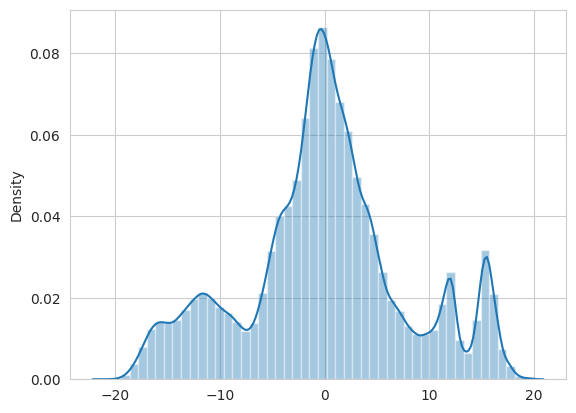

In [286]:
import seaborn as sns
Y_test_array = y_test.to_numpy()
sns.distplot(Y_test_array-prediction_lasso)

<Axes: ylabel='Density'>

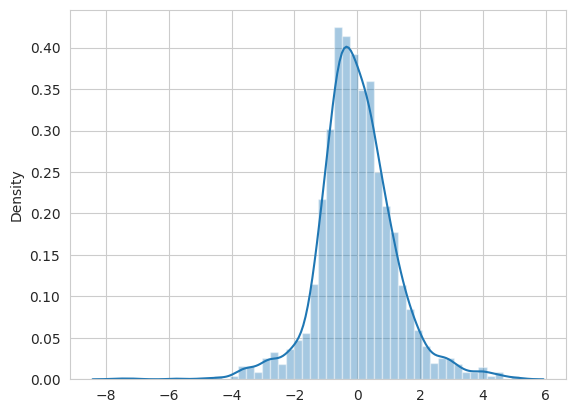

In [287]:
import seaborn as sns
sns.distplot(Y_test_array-prediction_ridge)

## Conclusion:
* We conclude that olsres3 is a good model for prediction and inference at 95.1% Ajd.$R^2$.
* Only Transmission and Onwer_type have a negative correlation to Price; ie. As Manual Transmissions lower the overall Pricing of used Cars than Automatic.
* As ownership level increases, the Pricing of used cars drop. 
* Year, Mileage, Power and Seats have positive assosiation with Pricing. 
* The above variables are the main features that impact the Price of a Used car